In [1]:
import pandas as pd
import glob
import os

dir = "datasets"


# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(dir, "*_all.csv"))


# Create an empty list to store individual DataFrames
dfs = []

# Loop through each file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    
    # Drop 'Unnamed: 0' column if it exists
    if "Unnamed: 0" in df.columns:
        df = df.drop(columns=["Unnamed: 0"])
        
    # Ensure datetime parsing
    df['dateTime'] = pd.to_datetime(df['dateTime'])
    
    dfs.append(df)

# Concatenate all DataFrames
full_df = pd.concat(dfs, ignore_index=True)

# Sort by dateTime (useful for time-series analysis)
full_df = full_df.sort_values(by="dateTime")

# Display DataFrame info
print(full_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 12467241 entries, 6900863 to 8228590
Data columns (total 8 columns):
 #   Column    Dtype                    
---  ------    -----                    
 0   uid       object                   
 1   dateTime  datetime64[ns, UTC+05:30]
 2   deviceId  object                   
 3   lat       float64                  
 4   long      float64                  
 5   pm1_0     float64                  
 6   pm2_5     float64                  
 7   pm10      float64                  
dtypes: datetime64[ns, UTC+05:30](1), float64(5), object(2)
memory usage: 856.1+ MB
None


In [2]:
full_df.reset_index(drop=True, inplace=True)


In [3]:
full_df['uid'] = full_df['uid'].astype('category')
full_df['deviceId'] = full_df['deviceId'].astype('category')


In [4]:
float_cols = ["lat", "long", "pm1_0", "pm2_5", "pm10"]
full_df[float_cols] = full_df[float_cols].astype("float32")


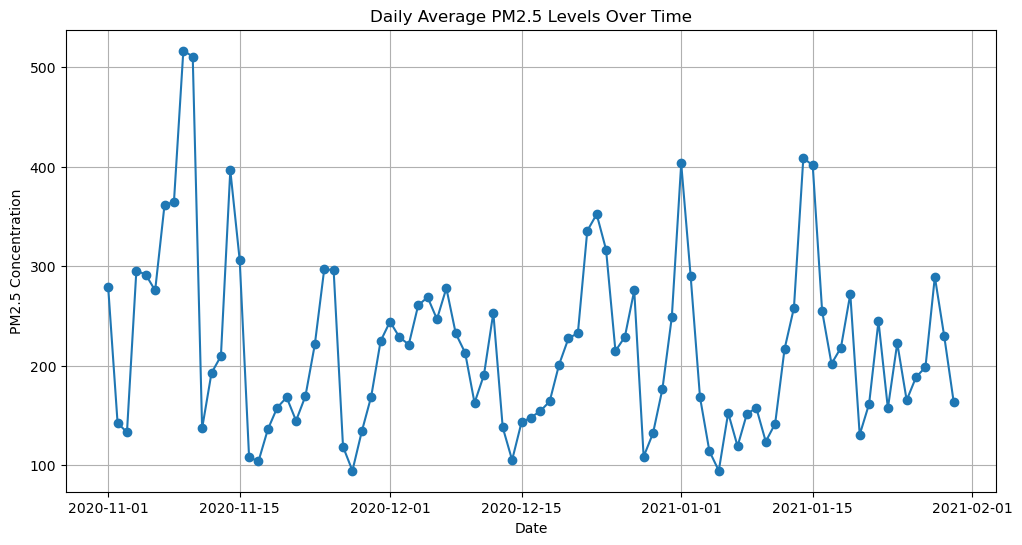

In [5]:
import matplotlib.pyplot as plt

# Resample data by day to reduce noise
daily_avg = full_df.resample('D', on='dateTime')['pm2_5'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.title("Daily Average PM2.5 Levels Over Time")
plt.grid()
plt.show()


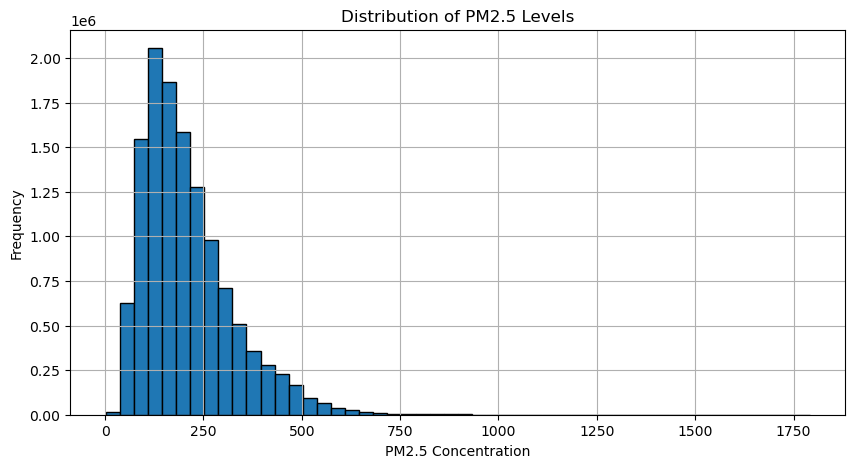

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(full_df['pm2_5'], bins=50, edgecolor='black')
plt.xlabel("PM2.5 Concentration")
plt.ylabel("Frequency")
plt.title("Distribution of PM2.5 Levels")
plt.grid()
plt.show()


/tmp/ipykernel_21541/4272375797.py:9: FutureWarning: The provided callable <function mean at 0x7e01259aeac0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = full_df.pivot_table(values='pm2_5', index='hour', columns='day', aggfunc=np.mean)


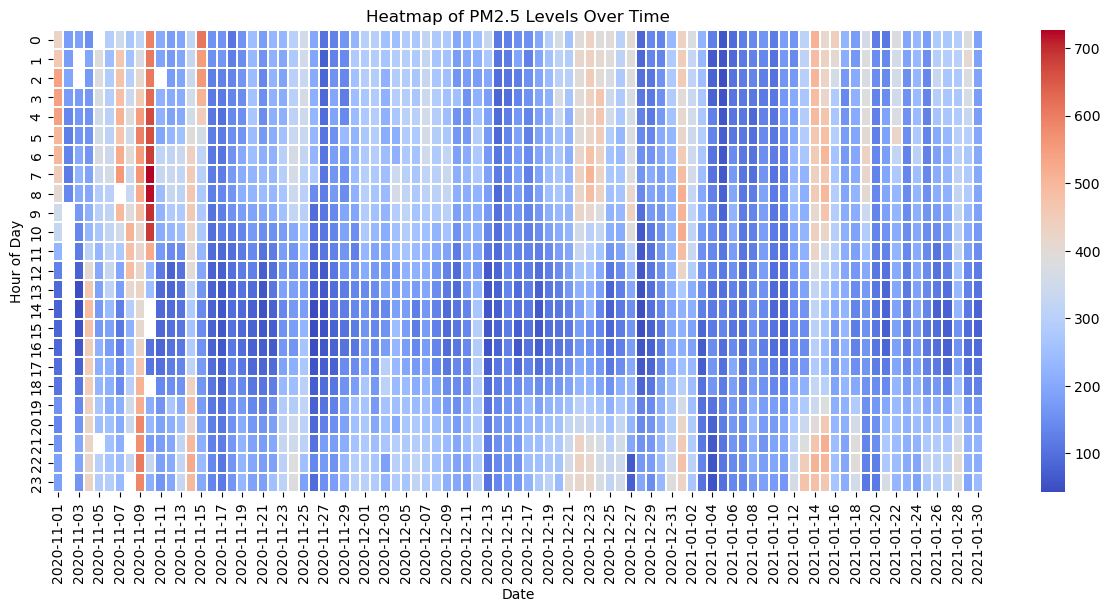

In [7]:
import seaborn as sns
import numpy as np

# Extract hour and day
full_df['hour'] = full_df['dateTime'].dt.hour
full_df['day'] = full_df['dateTime'].dt.date

# Pivot table for heatmap
heatmap_data = full_df.pivot_table(values='pm2_5', index='hour', columns='day', aggfunc=np.mean)

# Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.1)
plt.xlabel("Date")
plt.ylabel("Hour of Day")
plt.title("Heatmap of PM2.5 Levels Over Time")
plt.show()


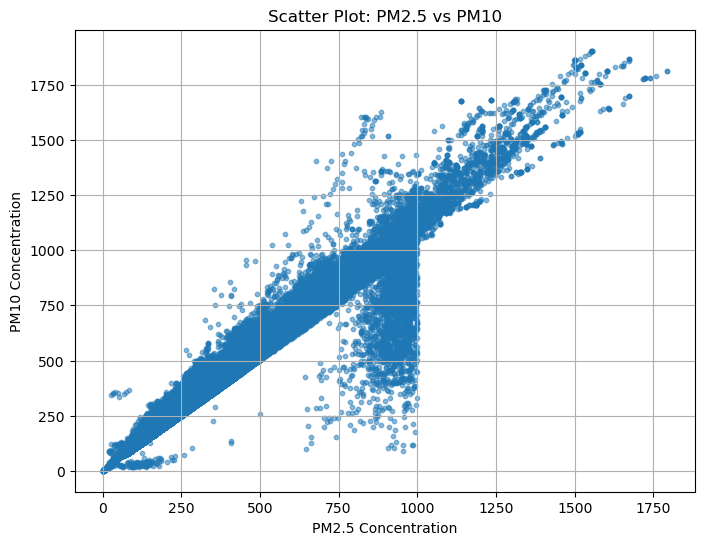

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(full_df['pm2_5'], full_df['pm10'], alpha=0.5, s=10)
plt.xlabel("PM2.5 Concentration")
plt.ylabel("PM10 Concentration")
plt.title("Scatter Plot: PM2.5 vs PM10")
plt.grid()
plt.show()


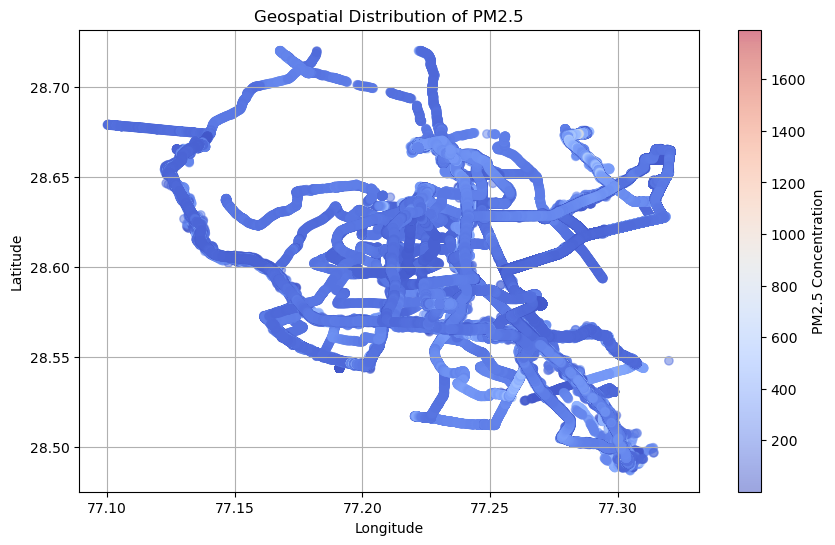

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(full_df['long'], full_df['lat'], c=full_df['pm2_5'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label="PM2.5 Concentration")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of PM2.5")
plt.grid()
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=full_df['dateTime'].dt.hour, y=full_df['pm2_5'])
plt.xlabel("Hour of Day")
plt.ylabel("PM2.5 Concentration")
plt.title("PM2.5 Variation Throughout the Day")
plt.grid()
plt.show()


In [ ]:
# Extract year-month for grouping
full_df['month'] = full_df['dateTime'].dt.to_period('M')

# Compute monthly averages
monthly_avg = full_df.groupby('month')['pm2_5'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index.astype(str), monthly_avg, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("PM2.5 Concentration")
plt.title("Monthly Average PM2.5 Levels")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
# Get average PM2.5 per device
device_avg = full_df.groupby('deviceId')['pm2_5'].mean().sort_values()

plt.figure(figsize=(12, 6))
device_avg.plot(kind='bar', color='steelblue')
plt.xlabel("Device ID")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Average PM2.5 Levels per Device")
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [ ]:
sns.pairplot(full_df[['pm1_0', 'pm2_5', 'pm10']])
plt.suptitle("Pairplot of PM1.0, PM2.5, and PM10", y=1.02)
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(full_df[['pm1_0', 'pm2_5', 'pm10']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Air Quality Metrics")
plt.show()
